In [57]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
import warnings 


In [58]:
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [59]:
df =pd.read_csv('../AIML Dataset.csv')

In [60]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [62]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [63]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [64]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [65]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [66]:
df.shape

(6362620, 11)

In [67]:
# claculate the fraud count percentage 
print(round(df["isFraud"].value_counts()[1]/len(df)*100,2),"%")

0.13 %


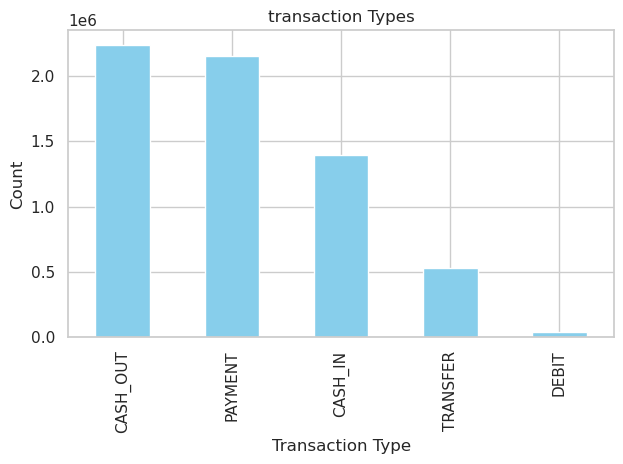

In [68]:
df.type.value_counts().plot(kind='bar',title="transaction Types",color="skyblue") 
plt.xlabel("Transaction Type") 
plt.ylabel("Count") 
plt.tight_layout()
plt.show()

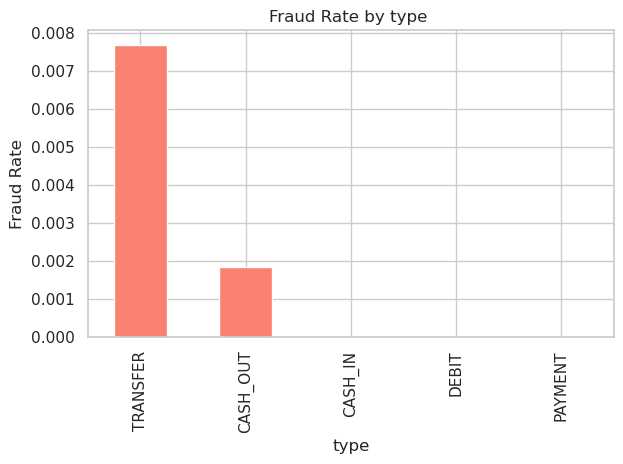

In [69]:
# plot the fraud mean accoding to the type 
fraud_by_type =df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind="bar",title="Fraud Rate by type ",color="salmon") 
plt.ylabel("Fraud Rate") 
plt.tight_layout()
plt.show()

In [70]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

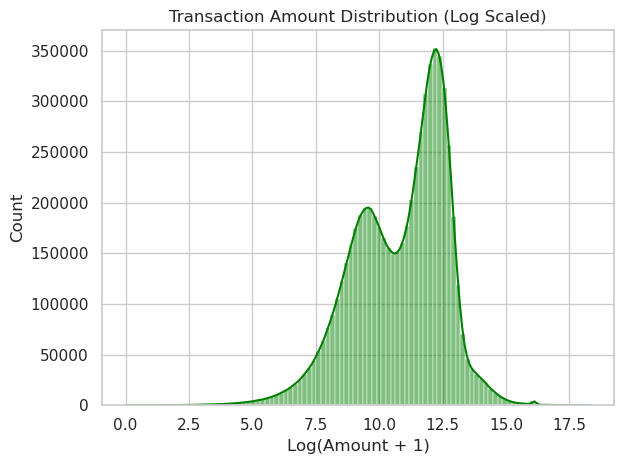

In [71]:
sns.histplot(np.log1p(df["amount"]),bins=100,color="green",kde=True) 
plt.title("Transaction Amount Distribution (Log Scaled)") 
plt.xlabel("Log(Amount + 1)") 
plt.tight_layout() 
plt.show()

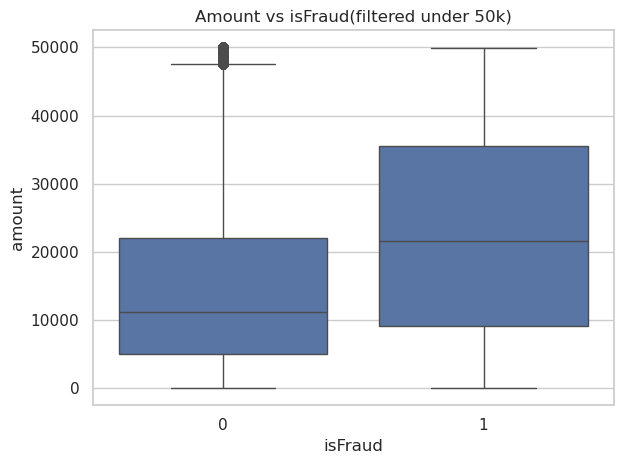

In [72]:
sns.boxplot(data=df[df["amount"]<50000],x="isFraud",y="amount") 
plt.title("Amount vs isFraud(filtered under 50k)")
plt.tight_layout()
plt.show()

In [73]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [74]:
df["balanceDiffOrig"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["balanceDiffDest"] = df["newbalanceDest"] - df["oldbalanceDest"]

In [75]:
(df["balanceDiffOrig"]<0).sum()

np.int64(1399253)

In [76]:
(df["balanceDiffDest"]<0).sum()

np.int64(1238864)

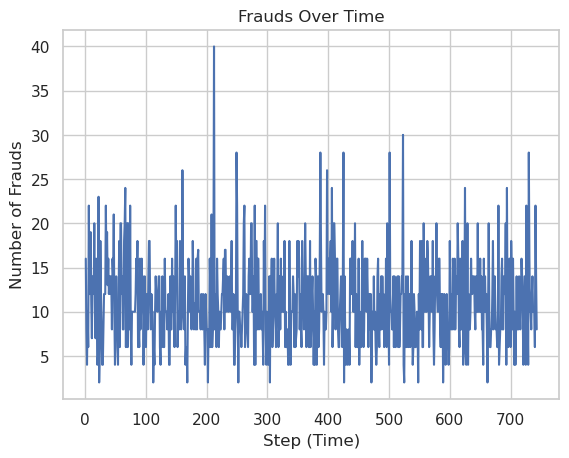

In [81]:
fraud_by_step =df[df["isFraud"]==1]['step'].value_counts().sort_index() 
plt.plot(fraud_by_step.index,fraud_by_step.values,label="Fruads per Step") 
plt.xlabel("Step (Time)") 
plt.ylabel("Number of Frauds") 
plt.title("Frauds Over Time") 
plt.grid(True)
plt.show()

In [82]:
df.drop(columns="step",inplace=True)

In [83]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [84]:
df.columns

Index(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'balanceDiffOrig', 'balanceDiffDest'],
      dtype='object')

In [86]:
to_senders =df["nameOrig"].value_counts().head(10)

In [87]:
to_senders

nameOrig
C1530544995    3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
C1462946854    3
C1065307291    3
C1999539787    3
C2098525306    3
C400299098     3
Name: count, dtype: int64

In [88]:
to_receivers =df["nameDest"].value_counts().head(10)

In [89]:
to_receivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C1789550256     99
C451111351      99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [90]:
fraud_users =df[df["isFraud"]==1]["nameOrig"].value_counts().head(10)

In [91]:
fraud_users

nameOrig
C1280323807    1
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C1039979813    1
C2089752665    1
C1614818636    1
C40604503      1
C1970706589    1
Name: count, dtype: int64

In [94]:
fraud_types =df[df["type"].isin(["TRANSFER","CASH_OUT"])]

In [98]:
fraud_types.type.value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

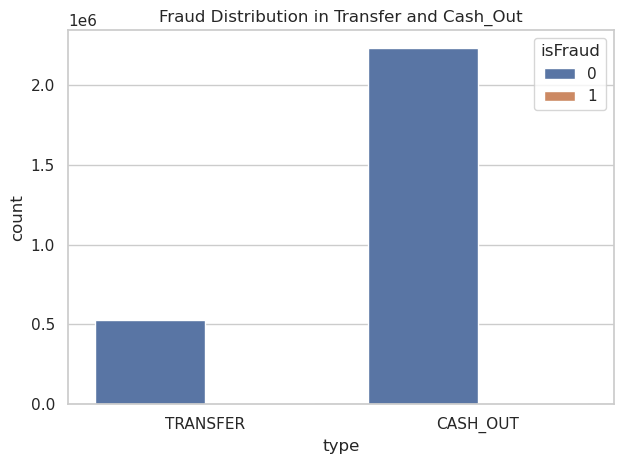

In [99]:
sns.countplot(data=fraud_types,x="type",hue="isFraud") 
plt.title("Fraud Distribution in Transfer and Cash_Out") 
plt.tight_layout() 
plt.show()